In [135]:
from util import (
    download_relationship_metrics_csv,
    read_relationship_metrics_csv,
    get_world_data,
    get_agent_data,
    generate_plot_title,
    download_all_maps
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [136]:
simulations = [
    ("S1", "test-700689", "Neutral Personality"),
    ("S2", "test-569b99", "Neutral Personality"),
    ("S3", "test-cce90c", "Solitary Personality"),
    #("S4", "test-4052fd", "Neutral Personality"),
    #("S4-b", "test-a35898", "Neutral Personality"),
]

sim = 0

test_id = simulations[sim][0]
simulation_id = simulations[sim][1]
personality = simulations[sim][2]
redownload = False

data_dir = os.path.abspath(os.path.join("..", "data", simulation_id))

download_relationship_metrics_csv(simulation_id=simulation_id, redownload=redownload)
download_all_maps(simulation_id=simulation_id, redownload=redownload)
df = read_relationship_metrics_csv(simulation_id=simulation_id)

df.head()

CSV already exists at ../data/test-700689/test-700689-graph-metrics.csv. Skipping download.
Zip file already exists at ../data/test-700689/maps/simulation_test-700689_maps.zip. Skipping download.


,tick,average_sentiment,average_normalized_sentiment,density,clustering_coefficient,num_nodes,num_edges,num_components,largest_component_size,average_degree_centrality,num_communities,modularity
0,1,0.000000,0.000000,0.000000,0.0,12,0,12,1,0.000000,12,0.000000
1,2,0.428181,0.605345,0.030303,0.0,12,2,10,2,0.030303,10,0.499709
2,3,0.242044,0.560214,0.030303,0.0,12,2,10,2,0.030303,10,0.499977
3,4,0.207375,0.551654,0.030303,0.0,12,2,10,2,0.030303,10,0.499962
4,5,0.303876,0.575238,0.045455,0.0,12,3,9,2,0.045455,9,0.666134


In [137]:
df_filtered = pd.concat([
    df.iloc[[0]],
    df.iloc[1:][df.iloc[1:]['average_sentiment'] != 0]
]).copy()
df_filtered['tick'] = range(1, len(df_filtered) + 1)
df_filtered = df_filtered.sort_values('tick').reset_index(drop=True)
df_filtered = df_filtered.iloc[:100].reset_index(drop=True)
df_filtered.head()


,tick,average_sentiment,average_normalized_sentiment,density,clustering_coefficient,num_nodes,num_edges,num_components,largest_component_size,average_degree_centrality,num_communities,modularity
0,1,0.000000,0.000000,0.000000,0.0,12,0,12,1,0.000000,12,0.000000
1,2,0.428181,0.605345,0.030303,0.0,12,2,10,2,0.030303,10,0.499709
2,3,0.242044,0.560214,0.030303,0.0,12,2,10,2,0.030303,10,0.499977
3,4,0.207375,0.551654,0.030303,0.0,12,2,10,2,0.030303,10,0.499962
4,5,0.303876,0.575238,0.045455,0.0,12,3,9,2,0.045455,9,0.666134


In [138]:
world_data = get_world_data(simulation_id)
agent_data = get_agent_data(simulation_id)

In [139]:
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

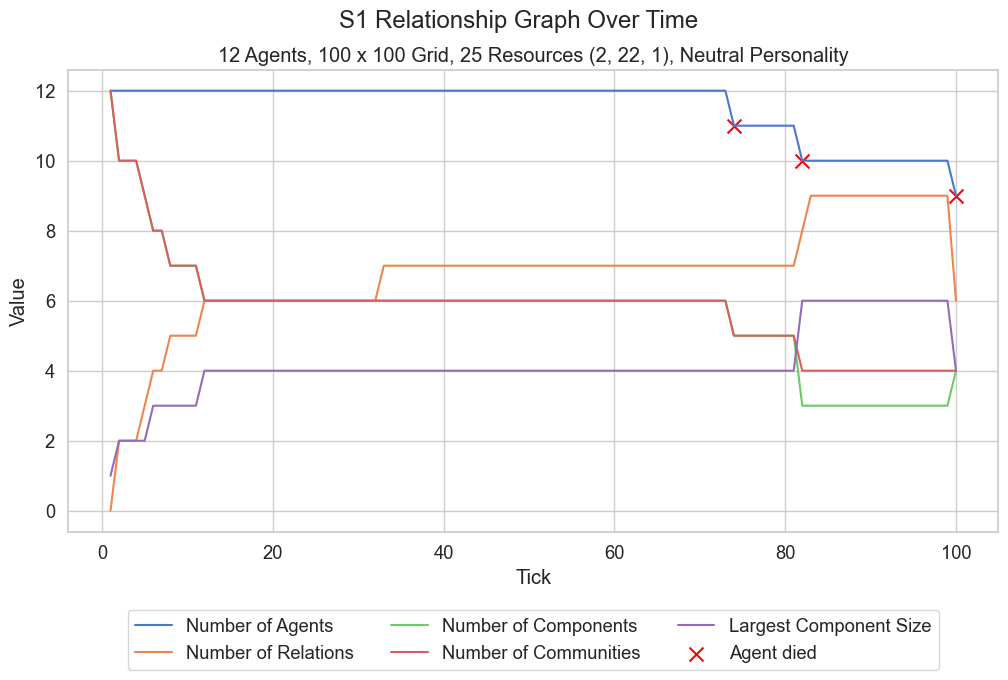

In [140]:
selected_metrics = [
    ("num_nodes", "Number of Agents"),
    ("num_edges", "Number of Relations"),
    ("num_components", "Number of Components"),
    ("num_communities", "Number of Communities"),
    ("largest_component_size", "Largest Component Size"),
]

plt.figure(figsize=(12, 6))
for (metric, label) in selected_metrics:
    sns.lineplot(data=df_filtered, x="tick", y=metric, label=label)

# Find ticks where 'num_nodes' changes, except at the first tick
num_nodes = df_filtered['num_nodes']
change_indices = num_nodes[num_nodes.diff() != 0].index
change_indices = change_indices[change_indices != 0]  # exclude the first tick (index 0)
change_ticks = df_filtered.loc[change_indices, 'tick']
change_values = df_filtered.loc[change_indices, 'num_nodes']

# Mark changes with red 'x'
plt.scatter(change_ticks, change_values, color='red', marker='x', s=100, label='Agent died')

plt.xlabel("Tick")
plt.ylabel("Value")
plt.title(generate_plot_title(world_data, len(agent_data), personality))
plt.suptitle(f"{test_id} Relationship Graph Over Time")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.savefig(
    os.path.join(data_dir, f"{simulation_id}_number_of_x.png"),
    dpi=300,
    bbox_inches="tight",
)


plt.show()

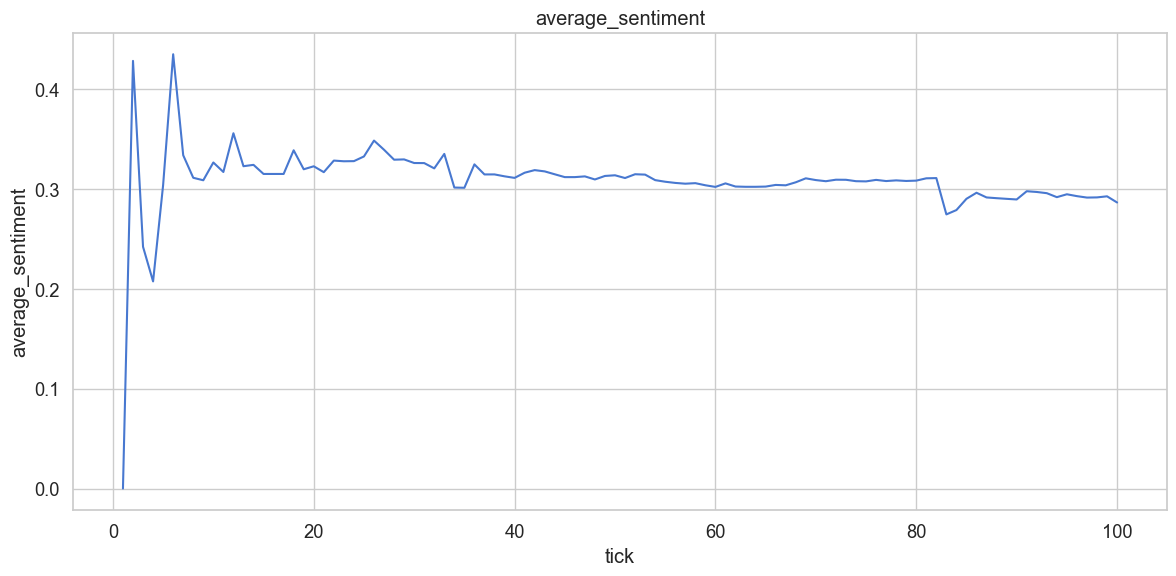

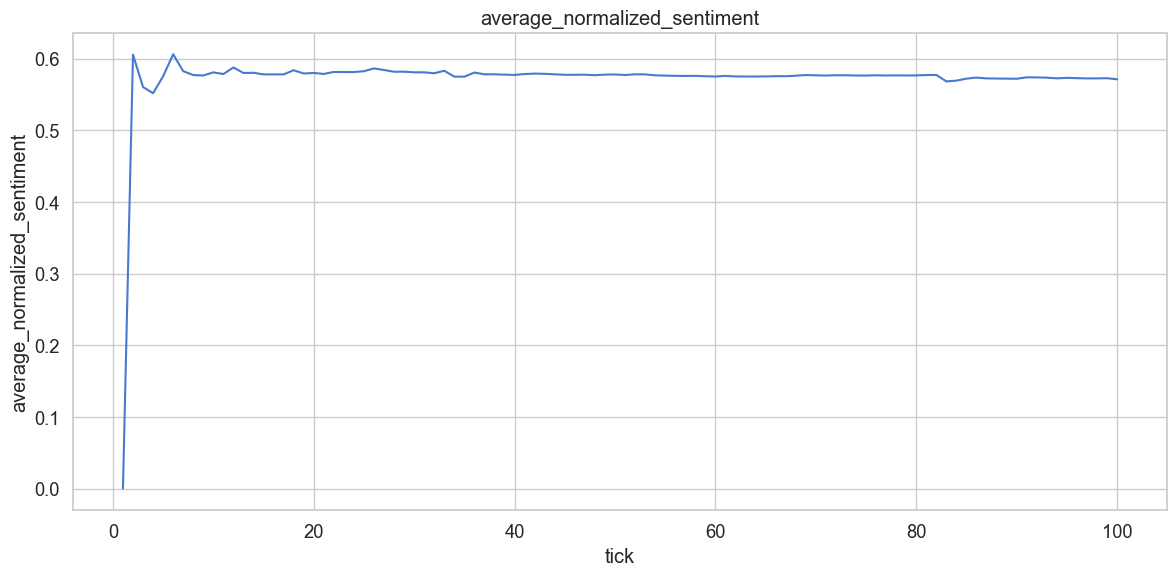

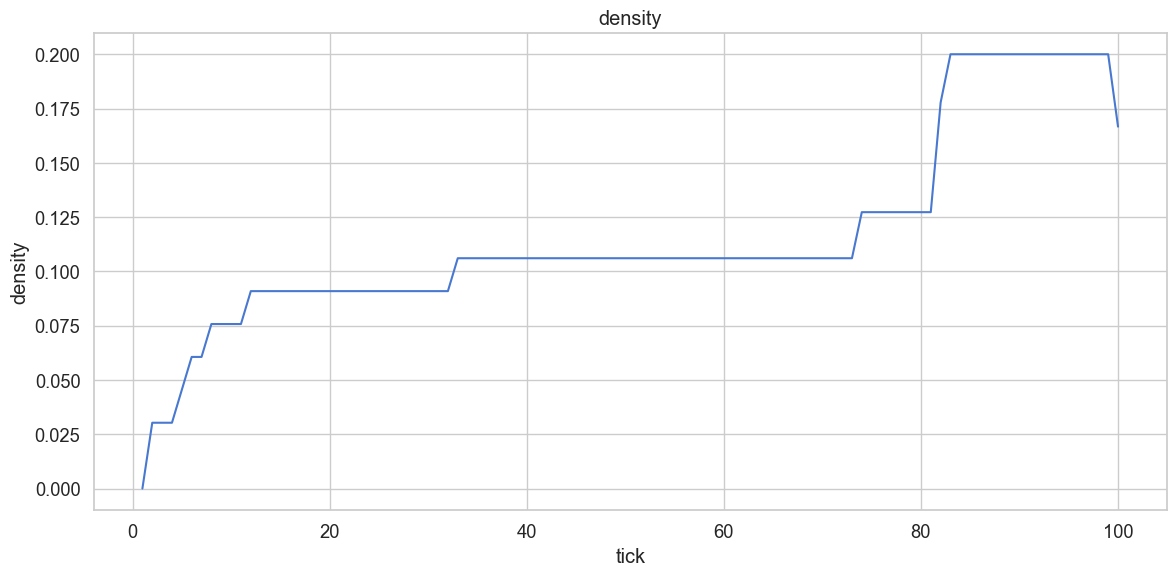

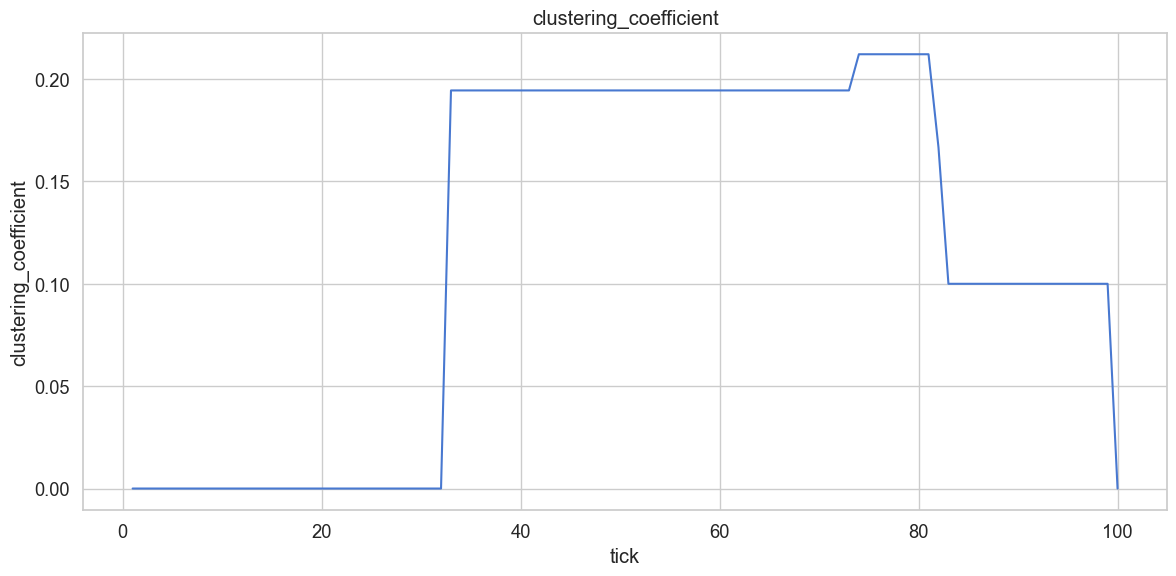

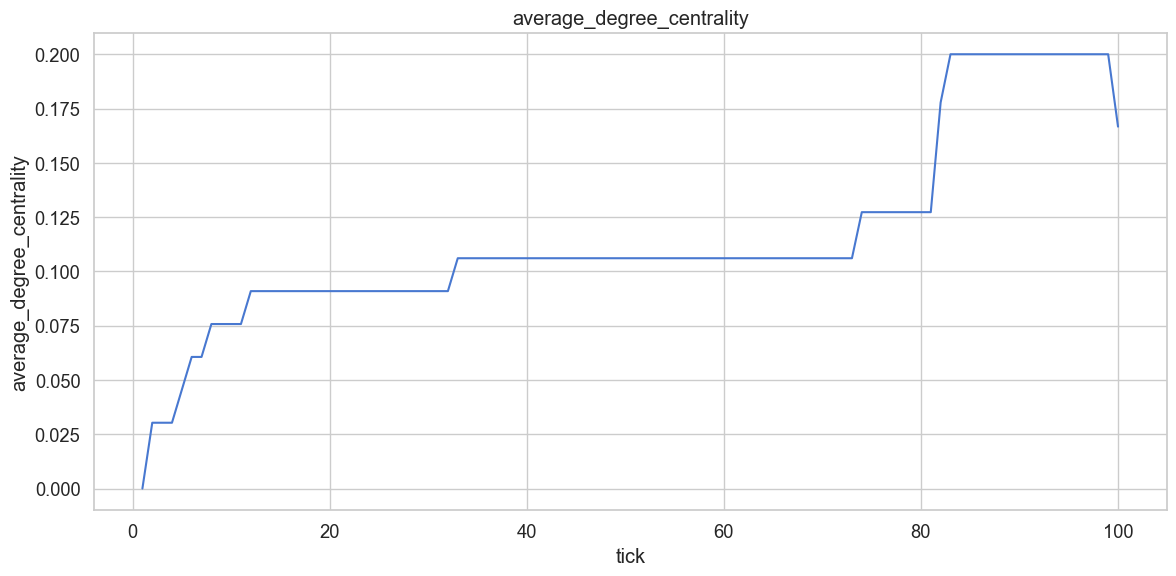

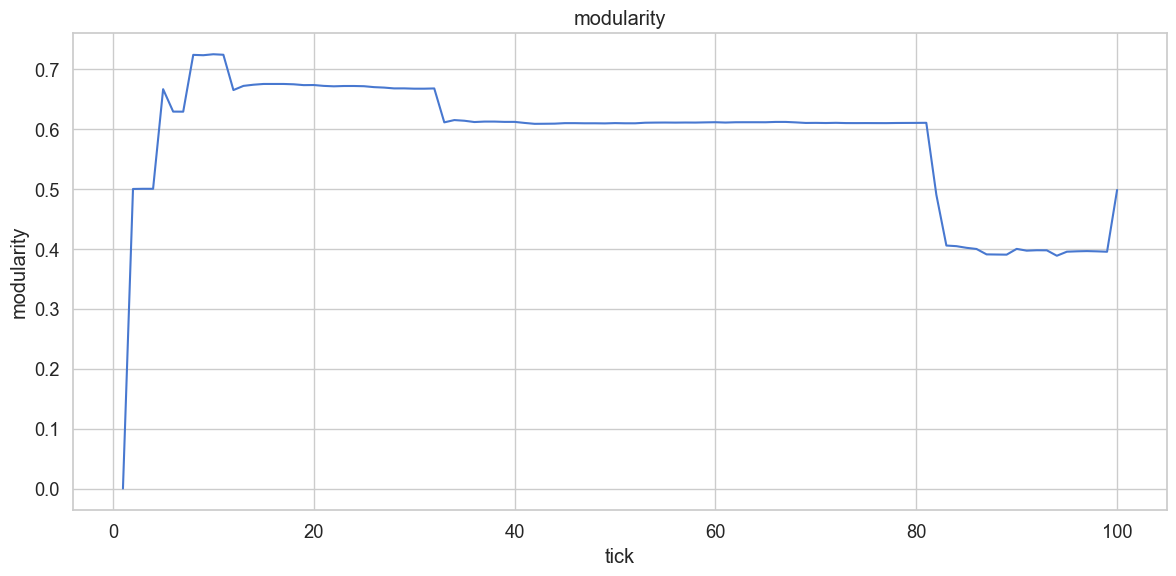

In [141]:
import seaborn as sns

metrics = [col for col in df_filtered.columns if col != "tick"]
selected_metric_names = [m[0] for m in selected_metrics]
other_metrics = [m for m in metrics if m not in selected_metric_names]
for metric in other_metrics:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_filtered, x="tick", y=metric)
    plt.title(metric)
    plt.xlabel("tick")
    plt.ylabel(metric)
    plt.tight_layout()
    plt.savefig(os.path.join(data_dir, f"{simulation_id}_{metric}.png"), dpi=300)

    plt.show()

In [142]:
from util import get_action_logs

action_logs = get_action_logs(simulation_id)

df_actions = pd.DataFrame(action_logs)
df_actions = df_actions[df_actions['tick'] <= 100]

actions = [
    "move",
    "random_move",
    "start_conversation",
    "end_conversation",
    "continue_conversation",
    "accept_conversation_request",
    "decline_conversation_request",
    "harvest_resource",
    "continue_waiting",
    "stop_waiting",
    "harvested_resource_finished",
]

action_counts = {}
for act in actions:
    # Count rows where the action string contains the action name (case-insensitive) and does NOT contain 'error' (case-insensitive)
    mask_action = df_actions['action'].str.contains(act, case=False, na=False)
    mask_no_error = ~df_actions['feedback'].str.contains('error', case=False, na=False)
    action_counts[act] = (mask_action & mask_no_error).sum()
    # Add a column for erroneous calls for this action
    col_err = f"{act}_error"
    action_counts[col_err] = (mask_action & ~mask_no_error).sum()

action_counts = pd.Series(action_counts)

# Prepare the output CSV path
csv_path = os.path.join("../data", "actions.csv")

# Prepare the row to write
row = {"test_id": test_id, "simulation_id": simulation_id}
row.update(action_counts.to_dict())

# Try to read existing CSV, update or append the row, and save back
if os.path.exists(csv_path):
    df_joint = pd.read_csv(csv_path, index_col=False)
    # Remove any existing row with the same simulation_id
    df_joint = df_joint[df_joint["simulation_id"] != simulation_id]
    # Append the new row
    df_joint = pd.concat([df_joint, pd.DataFrame([row])], ignore_index=True)
else:
    df_joint = pd.DataFrame([row])

# Save to CSV
df_joint.to_csv(csv_path, index=False)

df_joint

,test_id,simulation_id,move,move_error,random_move,random_move_error,start_conversation,start_conversation_error,end_conversation,end_conversation_error,...,decline_conversation_request,decline_conversation_request_error,harvest_resource,harvest_resource_error,continue_waiting,continue_waiting_error,stop_waiting,stop_waiting_error,harvested_resource_finished,harvested_resource_finished_error
0,S2,test-569b99,439,145,3,2,53,14,54,0,...,3,0,53,15,12,0,8,0,17,0
1,S3,test-cce90c,519,193,7,10,25,13,9,0,...,16,2,84,25,37,0,44,0,10,0
2,S4,test-4052fd,375,122,1,3,58,38,56,0,...,4,1,47,23,28,0,11,0,18,0
3,S4-b,test-a35898,356,137,1,3,50,42,42,1,...,6,0,60,18,45,0,25,0,18,0
4,S1,test-700689,289,123,4,5,56,24,56,0,...,2,0,76,34,58,0,47,0,26,0


CSV already exists at ../data/test-700689/test-700689-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-569b99/test-569b99-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-cce90c/test-cce90c-graph-metrics.csv. Skipping download.


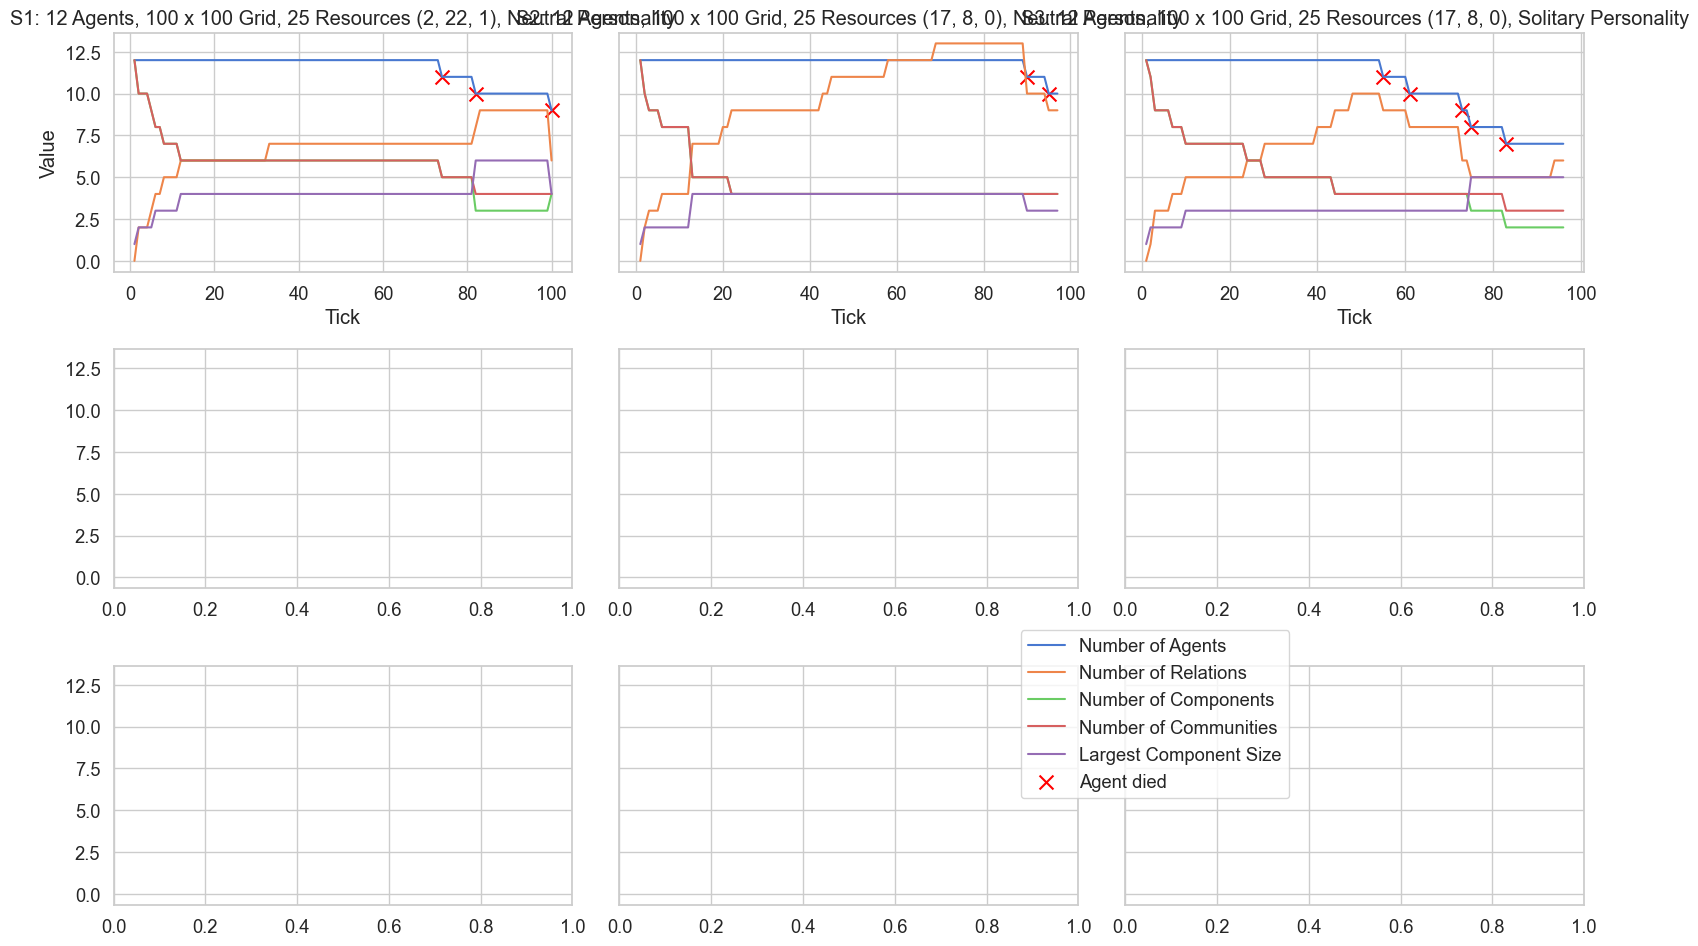

In [143]:
fig, axes = plt.subplots(3, 3, figsize=(16, 10), sharey=True)
axes = axes.flatten()
for i, (test_id, simulation_id, personality) in enumerate(simulations):
    data_dir = os.path.abspath(os.path.join("..", "data", simulation_id))
    download_relationship_metrics_csv(simulation_id=simulation_id, redownload=redownload)
    df = read_relationship_metrics_csv(simulation_id=simulation_id)
    world_data = get_world_data(simulation_id)
    agent_data = get_agent_data(simulation_id)
    df_filtered = pd.concat([
        df.iloc[[0]],
        df.iloc[1:][df.iloc[1:]['average_sentiment'] != 0]
    ]).copy()
    df_filtered['tick'] = range(1, len(df_filtered) + 1)
    df_filtered = df_filtered.sort_values('tick').reset_index(drop=True)
    df_filtered = df_filtered.iloc[:100].reset_index(drop=True)
    world_data = get_world_data(simulation_id)
    agent_data = get_agent_data(simulation_id)
    for metric, label in selected_metrics:
        sns.lineplot(data=df_filtered, x="tick", y=metric, label=label if i == 0 else None, ax=axes[i])
    num_nodes = df_filtered["num_nodes"]
    change_indices = num_nodes[num_nodes.diff() != 0].index
    change_indices = change_indices[change_indices != 0]
    change_ticks = df_filtered.loc[change_indices, "tick"]
    change_values = df_filtered.loc[change_indices, "num_nodes"]
    axes[i].scatter(change_ticks, change_values, color="red", marker="x", s=100, label="Agent died" if i == 0 else None)
    axes[i].set_xlabel("Tick")
    axes[i].set_title(test_id + ": " + generate_plot_title(world_data, len(agent_data), personality))
    if axes[i].get_legend() is not None:
        axes[i].get_legend().remove()

axes[0].set_ylabel("Value")
axes[1].set_ylabel("Value")
axes[2].set_ylabel("Value")

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower right", bbox_to_anchor=(0.8, 0.15))
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../data/relationship_graph.png", dpi=300, bbox_inches="tight")
plt.show()


CSV already exists at ../data/test-700689/test-700689-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-569b99/test-569b99-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-cce90c/test-cce90c-graph-metrics.csv. Skipping download.


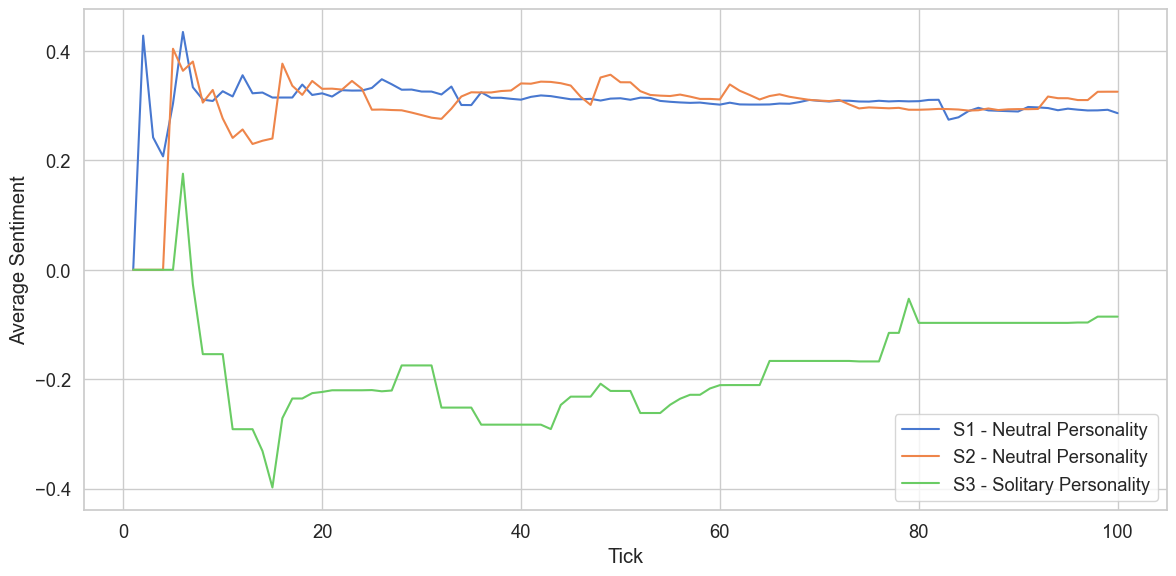

In [144]:
plt.figure(figsize=(12, 6))
for test_id, simulation_id, personality in simulations:
    download_relationship_metrics_csv(
        simulation_id=simulation_id, redownload=redownload
    )
    df = read_relationship_metrics_csv(simulation_id=simulation_id)
    df["tick"] = range(1, len(df) + 1)
    df = df.sort_values("tick").reset_index(drop=True)
    df = df.iloc[:100].reset_index(drop=True)
    sns.lineplot(
        data=df,
        x="tick",
        y="average_sentiment",
        label=test_id + " - " + personality,
    )

plt.xlabel("Tick")
plt.ylabel("Average Sentiment")
plt.legend()
plt.tight_layout()
plt.savefig(
    "../data/avg_sentiment_all.png", dpi=300, bbox_inches="tight"
)
plt.show()

CSV already exists at ../data/test-700689/test-700689-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-569b99/test-569b99-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-cce90c/test-cce90c-graph-metrics.csv. Skipping download.


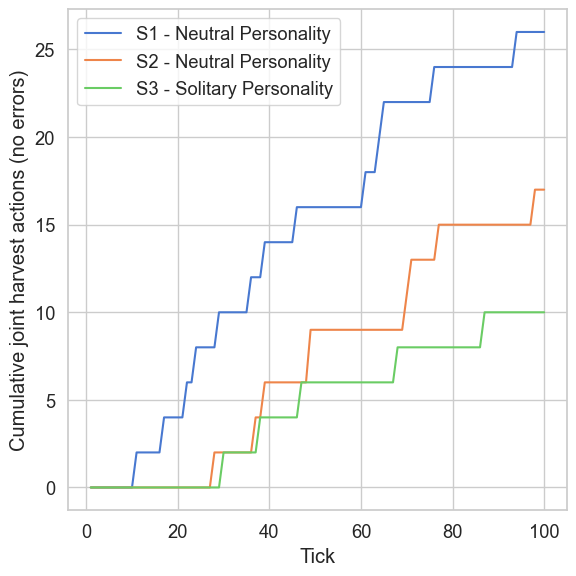

In [145]:
plt.figure(figsize=(6, 6))
for test_id, simulation_id, personality in simulations:
    download_relationship_metrics_csv(
        simulation_id=simulation_id, redownload=redownload
    )
    df_actions_sim = pd.DataFrame(get_action_logs(simulation_id))
    df_actions_sim = df_actions_sim[df_actions_sim["tick"] <= 100]
    mask_action = df_actions_sim["action"].str.contains(
        "harvested_resource_finished", case=False, na=False
    )
    mask_no_error = ~df_actions_sim["feedback"].str.contains("error", case=False, na=False)
    harvested_counts = (
        df_actions_sim[mask_action & mask_no_error]
        .groupby("tick")
        .size()
        .reindex(range(1, 101), fill_value=0)
        .cumsum()
    )
    plt.plot(
        harvested_counts.index,
        harvested_counts.values,
        label=f"{test_id} - {personality}",
    )

plt.xlabel("Tick")
plt.ylabel("Cumulative joint harvest actions (no errors)")
plt.legend()
plt.tight_layout()
plt.savefig("../data/harvested_together_all.png", dpi=300, bbox_inches="tight")
plt.show()

CSV already exists at ../data/test-700689/test-700689-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-569b99/test-569b99-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-cce90c/test-cce90c-graph-metrics.csv. Skipping download.


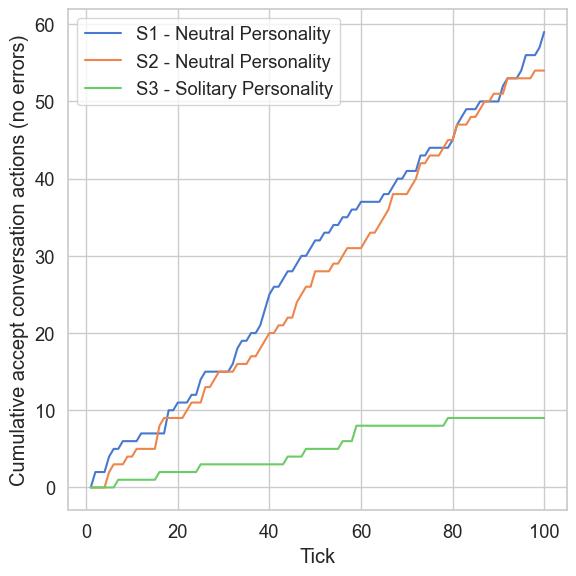

In [146]:
plt.figure(figsize=(6, 6))
for test_id, simulation_id, personality in simulations:
    download_relationship_metrics_csv(
        simulation_id=simulation_id, redownload=redownload
    )
    df_actions_sim = pd.DataFrame(get_action_logs(simulation_id))
    df_actions_sim = df_actions_sim[df_actions_sim["tick"] <= 100]
    mask_action = df_actions_sim["action"].str.contains(
        "accept_conversation_request", case=False, na=False
    )
    mask_no_error = ~df_actions_sim["feedback"].str.contains("error", case=False, na=False)
    accepted_counts = (
        df_actions_sim[mask_action & mask_no_error]
        .groupby("tick")
        .size()
        .reindex(range(1, 101), fill_value=0)
        .cumsum()
    )
    plt.plot(
        accepted_counts.index,
        accepted_counts.values,
        label=f"{test_id} - {personality}",
    )

plt.xlabel("Tick")
plt.ylabel("Cumulative accept conversation actions (no errors)")
plt.legend()
plt.tight_layout()
plt.savefig("../data/accept_conversation_request_all.png", dpi=300, bbox_inches="tight")
plt.show()

CSV already exists at ../data/test-700689/test-700689-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-569b99/test-569b99-graph-metrics.csv. Skipping download.
CSV already exists at ../data/test-cce90c/test-cce90c-graph-metrics.csv. Skipping download.


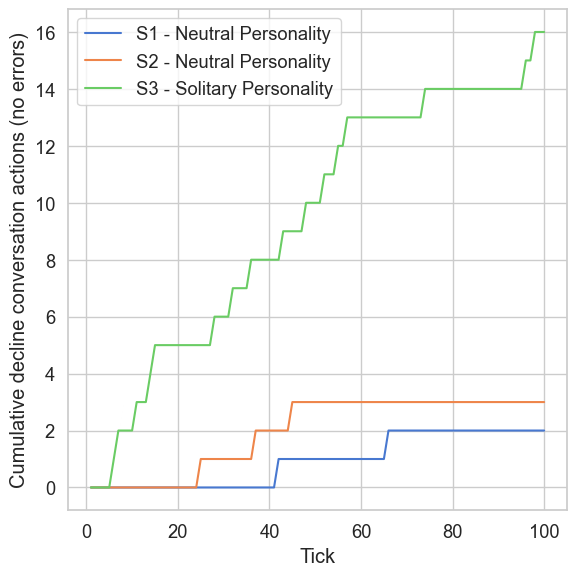

In [147]:
plt.figure(figsize=(6, 6))
for test_id, simulation_id, personality in simulations:
    download_relationship_metrics_csv(
        simulation_id=simulation_id, redownload=redownload
    )
    df_actions_sim = pd.DataFrame(get_action_logs(simulation_id))
    df_actions_sim = df_actions_sim[df_actions_sim["tick"] <= 100]
    mask_action = df_actions_sim["action"].str.contains(
        "decline_conversation_request", case=False, na=False
    )
    mask_no_error = ~df_actions_sim["feedback"].str.contains("error", case=False, na=False)
    declined_counts = (
        df_actions_sim[mask_action & mask_no_error]
        .groupby("tick")
        .size()
        .reindex(range(1, 101), fill_value=0)
        .cumsum()
    )
    plt.plot(
        declined_counts.index,
        declined_counts.values,
        label=f"{test_id} - {personality}",
    )

plt.xlabel("Tick")
plt.ylabel("Cumulative decline conversation actions (no errors)")
plt.legend()
plt.tight_layout()
plt.savefig("../data/decline_conversation_request_all.png", dpi=300, bbox_inches="tight")
plt.show()